In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from mpl_toolkits import mplot3d

# Opening CSV File

In [2]:
# Store filepath in a variable
file_one = "AB_NYC_2019.csv"

In [3]:
# Read our Data file with the pandas library
file_one_df = pd.read_csv(file_one)

In [4]:
#Display DF
file_one_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Cleaning Data

In [5]:
#Filling the Empty Last review with 0
file_one_df = file_one_df.fillna({"last_review":0})

In [6]:
#Filling the Empty review per month data with 0
file_one_df = file_one_df.fillna({"reviews_per_month":0})
file_one_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#Fill empty data in host name column
file_one_df = file_one_df.fillna({"host_name":"Anonymous"})   
file_one_df = file_one_df.fillna({"name":"No Description"})
file_one_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
#Save Complete clean file to CSV file
file_one_df.to_csv("AirBnBReplaceddata.csv")

Cleaning data by selecting only with more than 0 availability

In [9]:
Forclean_AirBnB_df = file_one_df.sort_values(["availability_365"], ascending=False)
clean_AirBnB_df = Forclean_AirBnB_df.loc[Forclean_AirBnB_df["availability_365"] > 0,:]
clean_AirBnB_df["id"].count()

31362

In [10]:
#Save data with availability bigger than 0 to CSV file
file_one_df.to_csv("cleanAirBnBData2.csv")

# Calculating Number of clean data compared to original data

In [11]:
#Calculating the number of data before and after cleaning
OriginalDataCount = len(file_one_df["id"])
CleanDataCount = len(clean_AirBnB_df["id"])
PercentCleanData = round(CleanDataCount/OriginalDataCount*100,2)

print(f"Sample data contains {OriginalDataCount} rows")
print(f"However the number of clean data is only {CleanDataCount} , which is {PercentCleanData}% of whole sample")

Sample data contains 48895 rows
However the number of clean data is only 31362 , which is 64.14% of whole sample


In [12]:
unique_host = clean_AirBnB_df['host_id'].unique()
len(unique_host)

21809

In [13]:
Longterm_AirBnB_df = clean_AirBnB_df.loc[clean_AirBnB_df["minimum_nights"] > 365,:]
Longterm_AirBnB_df["id"].count()

14

Checking minimum value vs Availability 365

In [14]:
Questionable_AirBnB_df = clean_AirBnB_df.loc[clean_AirBnB_df["minimum_nights"] > clean_AirBnB_df["availability_365"],:]
Questionable_AirBnB_df["id"].count()

833

# Making Functions for multiple uses

In [15]:
#Make function to add title, xlabel and ylabel in just one line
def set_graph_properties(title,xlabel,ylabel):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [16]:
#Make a function for adding text in bar graph
def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, height,
            ha='center', va='bottom')

# Analysis by Neighbourhood Group

1 By count

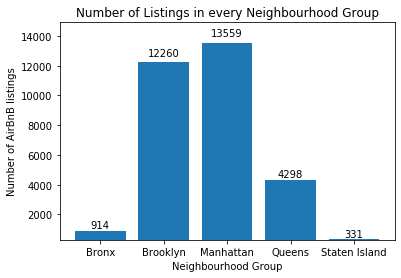

In [17]:
#neighbourhood_df = clean_AirBnB_df[["host_id","host_name","neighbourhood_group","neighbourhood","room_type","price","minimum_nights","number_of_reviews","reviews_per_month","availability_365"]]
grp_neighbourhood_df = clean_AirBnB_df.groupby("neighbourhood_group")
grp_neighbourhood_count_df = grp_neighbourhood_df.count()
x_axis = grp_neighbourhood_count_df.index
rects = plt.bar(x_axis,grp_neighbourhood_count_df["id"])
set_graph_properties("Number of Listings in every Neighbourhood Group","Neighbourhood Group","Number of AirBnB listings")

deltaposition = 0.1
plt.ylim((1-deltaposition)*grp_neighbourhood_count_df["id"].min(),(1+deltaposition)*grp_neighbourhood_count_df["id"].max())
autolabel(rects)
plt.show()

In [18]:
sort_grp_neighbourhood_count_df = grp_neighbourhood_count_df.sort_values(by = ["id"], ascending=False)
sort_grp_neighbourhood_count_df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Manhattan,13559,13559,13559,13559,13559,13559,13559,13559,13559,13559,13559,13559,13559,13559,13559
Brooklyn,12260,12260,12260,12260,12260,12260,12260,12260,12260,12260,12260,12260,12260,12260,12260
Queens,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298,4298
Bronx,914,914,914,914,914,914,914,914,914,914,914,914,914,914,914
Staten Island,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331


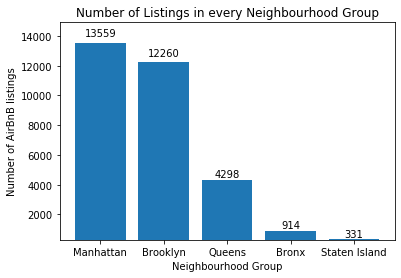

In [19]:
#neighbourhood_df = clean_AirBnB_df[["host_id","host_name","neighbourhood_group","neighbourhood","room_type","price","minimum_nights","number_of_reviews","reviews_per_month","availability_365"]]
x_axis = sort_grp_neighbourhood_count_df.index
rects = plt.bar(x_axis,sort_grp_neighbourhood_count_df["id"])
set_graph_properties("Number of Listings in every Neighbourhood Group","Neighbourhood Group","Number of AirBnB listings")

deltaposition = 0.1
plt.ylim((1-deltaposition)*grp_neighbourhood_count_df["id"].min(),(1+deltaposition)*grp_neighbourhood_count_df["id"].max())
autolabel(rects)

plt.savefig("")
plt.show()

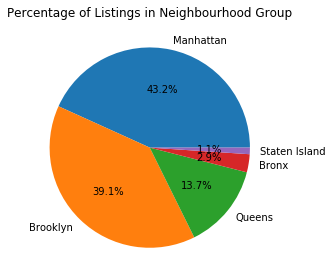

In [20]:
plt.pie(sort_grp_neighbourhood_count_df["id"],autopct="%1.1f%%", labels = sort_grp_neighbourhood_count_df.index)
set_graph_properties("Percentage of Listings in Neighbourhood Group","","")
plt.tight_layout()

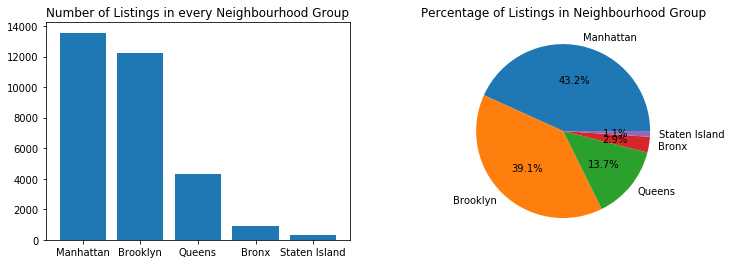

In [24]:
#Plotting 2 graph together within 2 columns
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.bar(x_axis,sort_grp_neighbourhood_count_df["id"])
ax2.pie(sort_grp_neighbourhood_count_df["id"],autopct="%1.1f%%", labels = sort_grp_neighbourhood_count_df.index)
ax1.title.set_text("Number of Listings in every Neighbourhood Group")
ax2.title.set_text("Percentage of Listings in Neighbourhood Group")

# Analysis of Neighbourhood on each Neighbourhood Group

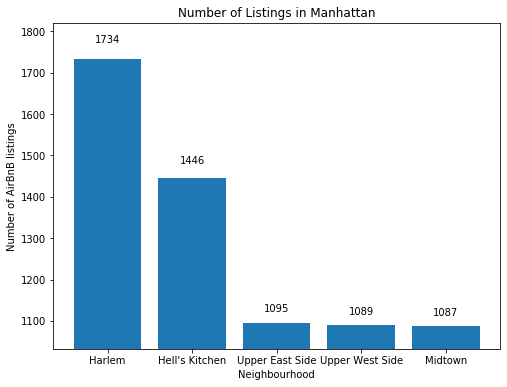

In [30]:
plt.figure(figsize=(8,6))

manhattan_df = clean_AirBnB_df[clean_AirBnB_df['neighbourhood_group']=="Manhattan"]

grp_manhattan_df = manhattan_df.groupby("neighbourhood")
count_grp_manhattan_df = grp_manhattan_df.count()
sort_count_grp_manhattan_df = count_grp_manhattan_df.sort_values("id", ascending = False)

topmanhattangroup = sort_count_grp_manhattan_df.head(5)

x_axis = topmanhattangroup.index
rects = plt.bar(x_axis,topmanhattangroup["id"])
set_graph_properties("Number of Listings in Manhattan","Neighbourhood","Number of AirBnB listings")

deltaposition = 0.05
plt.ylim((1-deltaposition)*topmanhattangroup["id"].min(),(1+deltaposition)*topmanhattangroup["id"].max())
autolabel(rects)

#plt.savefig("")
plt.show()

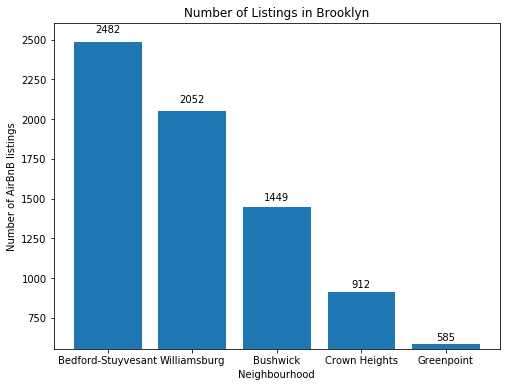

In [30]:
plt.figure(figsize=(8,6))

Brooklyn_df = clean_AirBnB_df[clean_AirBnB_df['neighbourhood_group']=="Brooklyn"]

grp_Brooklyn_df = Brooklyn_df.groupby("neighbourhood")
count_grp_Brooklyn_df = grp_Brooklyn_df.count()
sort_count_grp_Brooklyn_df = count_grp_Brooklyn_df.sort_values("id", ascending = False)

topBrooklyngroup = sort_count_grp_Brooklyn_df.head(5)

x_axis = topBrooklyngroup.index
rects = plt.bar(x_axis,topBrooklyngroup["id"])
set_graph_properties("Number of Listings in Brooklyn","Neighbourhood","Number of AirBnB listings")

deltaposition = 0.05
plt.ylim((1-deltaposition)*topBrooklyngroup["id"].min(),(1+deltaposition)*topBrooklyngroup["id"].max())
autolabel(rects)

#plt.savefig("")
plt.show()

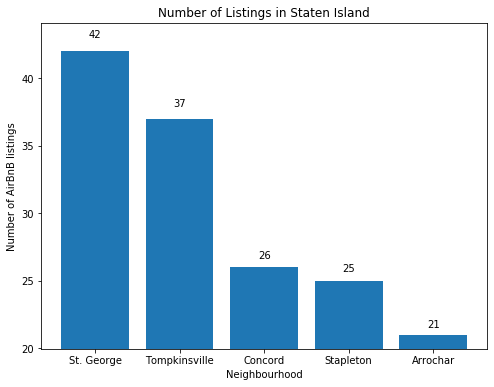

In [31]:
plt.figure(figsize=(8,6))

StatenIsland_df = clean_AirBnB_df[clean_AirBnB_df['neighbourhood_group']=="Staten Island"]

grp_StatenIsland_df = StatenIsland_df.groupby("neighbourhood")
count_grp_StatenIsland_df = grp_StatenIsland_df.count().sort_values("id", ascending = False)
sort_count_grp_StatenIsland_df = count_grp_StatenIsland_df.sort_values("id", ascending = False)


topStatenIslandgroup = sort_count_grp_StatenIsland_df.head(5)

x_axis = topStatenIslandgroup.index
rects = plt.bar(x_axis,topStatenIslandgroup["id"])
set_graph_properties("Number of Listings in Staten Island","Neighbourhood","Number of AirBnB listings")

deltaposition = 0.05
plt.ylim((1-deltaposition)*topStatenIslandgroup["id"].min(),(1+deltaposition)*topStatenIslandgroup["id"].max())
autolabel(rects)

#plt.savefig("")
plt.show()

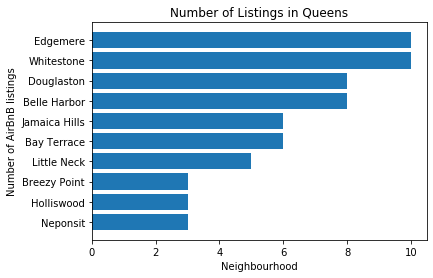

In [38]:
#plt.figure(figsize=(12,12))

Queens_df = clean_AirBnB_df[clean_AirBnB_df['neighbourhood_group']=="Queens"]

grp_Queens_df = Queens_df.groupby("neighbourhood")
count_grp_Queens_df = grp_Queens_df.count()
sort_count_grp_Queens_df = count_grp_Queens_df.sort_values("id", ascending = True)

topQueensgroup = sort_count_grp_Queens_df.head(10)

x_axis = topQueensgroup.index
rects = plt.barh(x_axis,topQueensgroup["id"])
set_graph_properties("Number of Listings in Queens","Neighbourhood","Number of AirBnB listings")

#deltaposition = 0.1
#plt.ylim((1-deltaposition)*topQueensgroup["id"].min(),(1+deltaposition)*topQueensgroup["id"].max())
#autolabel(rects)

#plt.savefig("")
plt.show()

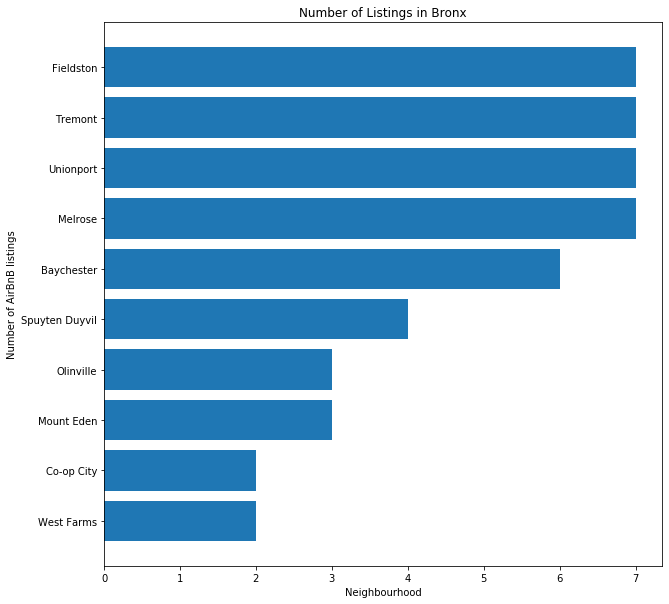

In [39]:
plt.figure(figsize=(10,10))

Bronx_df = clean_AirBnB_df[clean_AirBnB_df['neighbourhood_group']=="Bronx"]

grp_Bronx_df = Bronx_df.groupby("neighbourhood")
count_grp_Bronx_df = grp_Bronx_df.count()
sort_count_grp_Bronx_df = count_grp_Bronx_df.sort_values("id", ascending = True)

#topBronxgroup = sort_count_grp_Bronx_df
topBronxgroup = sort_count_grp_Bronx_df.head(10)

x_axis = topBronxgroup.index
rects = plt.barh(x_axis,topBronxgroup["id"])
set_graph_properties("Number of Listings in Bronx","Neighbourhood","Number of AirBnB listings")

#deltaposition = 0.05
#plt.ylim((1-deltaposition)*topBronxgroup["id"].min(),(1+deltaposition)*topBronxgroup["id"].max())
#autolabel(rects)

#plt.savefig("")
plt.show()

2 Analysis by Average Price

In [40]:
grp_neighbourhood_mean_df = grp_neighbourhood_df.mean().sort_values("price", ascending=False)
meanprice = round(grp_neighbourhood_mean_df["price"],2)
meanprice

neighbourhood_group
Manhattan        214.20
Brooklyn         132.85
Staten Island    114.23
Queens           100.03
Bronx             89.01
Name: price, dtype: float64

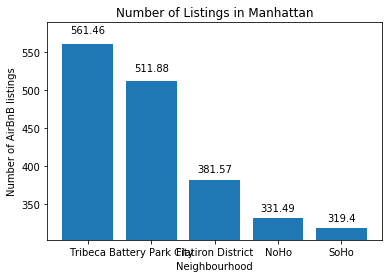

In [44]:

mean_grp_manhattan_df = grp_manhattan_df.mean()
sort_mean_grp_manhattan_df = mean_grp_manhattan_df.sort_values("price", ascending = False)

topmanhattanMeangroup = sort_mean_grp_manhattan_df.head()

x_axis = topmanhattanMeangroup.index
rects = plt.bar(x_axis,round(topmanhattanMeangroup["price"],2))
set_graph_properties("Number of Listings in Manhattan","Neighbourhood","Number of AirBnB listings")

deltaposition = 0.05
plt.ylim((1-deltaposition)*topmanhattanMeangroup["price"].min(),(1+deltaposition)*topmanhattanMeangroup["price"].max())
autolabel(rects)

#plt.savefig("")
#plt.tight_layout()
plt.show()

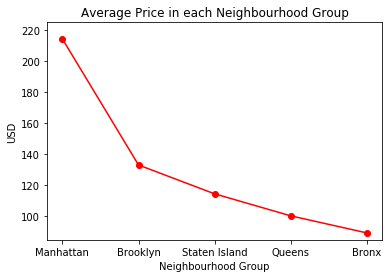

In [45]:
#fig = plt.figure()
plt.plot(grp_neighbourhood_mean_df.index, meanprice, marker = 'o', color = "r")
set_graph_properties("Average Price in each Neighbourhood Group","Neighbourhood Group","USD")

plt.ylim((1-deltaposition)*grp_neighbourhood_mean_df["price"].min(), (1+deltaposition)*grp_neighbourhood_mean_df["price"].max())

#for i, v in enumerate(meanprice):
#    ax.text(i, v+25, "%d" %v, v)
#    print(v)
    
plt.show()

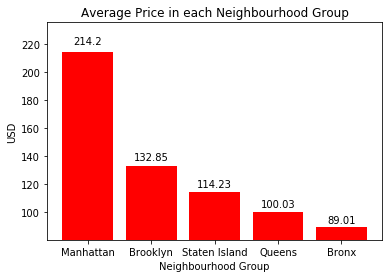

In [46]:
rects = plt.bar(grp_neighbourhood_mean_df.index, meanprice, color = "r")
set_graph_properties("Average Price in each Neighbourhood Group","Neighbourhood Group","USD")

deltaposition = 0.1
plt.ylim((1-deltaposition)*meanprice.min(), (1+deltaposition)*meanprice.max())
autolabel(rects)
plt.show()

# Analysis by RoomType

1 Analysis using BoxPlot within range of price

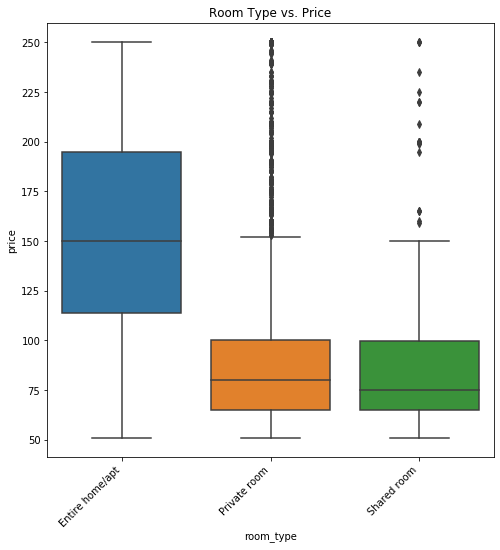

In [47]:
plt.figure(figsize=(8,8))
sort_price = clean_AirBnB_df.loc[(clean_AirBnB_df.price <= 250) & (clean_AirBnB_df.price > 50)]\
                   .groupby('room_type')['price']\
                   .median()\
                   .sort_values(ascending=False)\
                   .index
sns.boxplot(y='price', x='room_type', data=clean_AirBnB_df.loc[(clean_AirBnB_df.price <= 250) & (clean_AirBnB_df.price > 50)], order=sort_price)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Room Type vs. Price")
plt.show()

2 Analysis Price by RoomType

In [48]:
sort_grp_rtype_mean_df = round(clean_AirBnB_df.groupby(['room_type'])['price'].mean(),2)
sort_grp_rtype_mean_df

room_type
Entire home/apt    224.60
Private room        93.94
Shared room         65.99
Name: price, dtype: float64

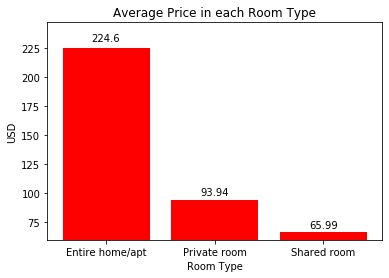

In [49]:
rects = plt.bar(sort_grp_rtype_mean_df.index, sort_grp_rtype_mean_df, color = "r")
set_graph_properties("Average Price in each Room Type","Room Type","USD")

deltaposition = 0.1
plt.ylim((1-deltaposition)*sort_grp_rtype_mean_df.min(), (1+deltaposition)*sort_grp_rtype_mean_df.max())
autolabel(rects)
plt.show()

# Analysis by Neighbourhood Group and Room Type

In [55]:
sort_grp_nhood_rtype_mean_df = round(clean_AirBnB_df.groupby(['neighbourhood_group','room_type'],as_index = False)['price'].mean(),2).sort_values(by=['price'], ascending=False)

In [56]:
sort_grp_rtype_nhood_mean_df = round(clean_AirBnB_df.groupby(['room_type','neighbourhood_group'],as_index = False)['price'].mean(),2)
sort_grp_rtype_nhood_mean_df

,room_type,neighbourhood_group,price
0,Entire home/apt,Bronx,131.68
1,Entire home/apt,Brooklyn,187.71
2,Entire home/apt,Manhattan,268.22
3,Entire home/apt,Queens,155.34
4,Entire home/apt,Staten Island,176.78
5,Private room,Bronx,66.70
6,Private room,Brooklyn,80.70
7,Private room,Manhattan,127.97
8,Private room,Queens,69.04
9,Private room,Staten Island,61.07


In [57]:
rtype = sort_grp_nhood_rtype_mean_df["room_type"].unique()
neighbourhood = sort_grp_nhood_rtype_mean_df["neighbourhood_group"].unique()

for i, hood in enumerate(neighbourhood):
    exec("y{}=sort_grp_nhood_rtype_mean_df[sort_grp_nhood_rtype_mean_df['neighbourhood_group']==hood]".format(i))

for i, type in enumerate(rtype):
    exec("z{}=sort_grp_rtype_nhood_mean_df[sort_grp_rtype_nhood_mean_df['room_type']==type]".format(i))
    
#sns.countplot(x="room_type", hue = "neighbourhood_group", data = clean_AirBnB_df)

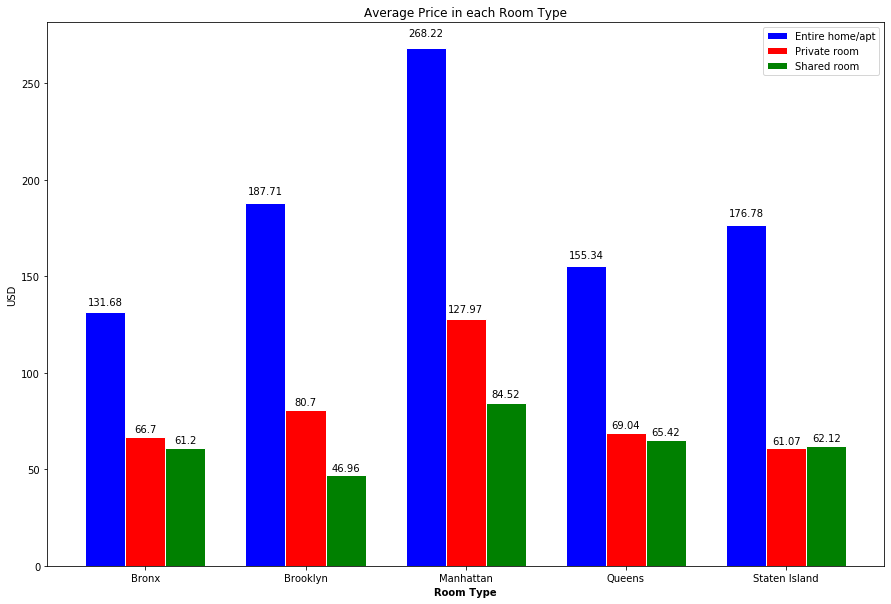

In [58]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/
plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = z0["price"]
bars2 = z1["price"]
bars3 = z2["price"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
rects1 = plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label=rtype[0])
rects2 = plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label=rtype[1])
rects3 = plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label=rtype[2])
 
# Add xticks on the middle of the group bars
plt.xlabel('Room Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], z0["neighbourhood_group"])
 
# Create legend & Show graphic
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

set_graph_properties("Average Price in each Room Type","Room Type","USD")

#deltaposition = 0.1
#plt.ylim((1-deltaposition)*sort_grp_nhood_rtype_mean_df.min(), (1+deltaposition)*sort_grp_nhood_rtype_mean_df.max())

plt.legend()
plt.show()

In [59]:
sort_grp_nhood_rtype_max_df = clean_AirBnB_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].max().sort_values(by=['price'], ascending=False)
sort_grp_nhood_rtype_max_df.head()

,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,10000
7,Manhattan,Private room,9999
3,Brooklyn,Entire home/apt,8000
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000


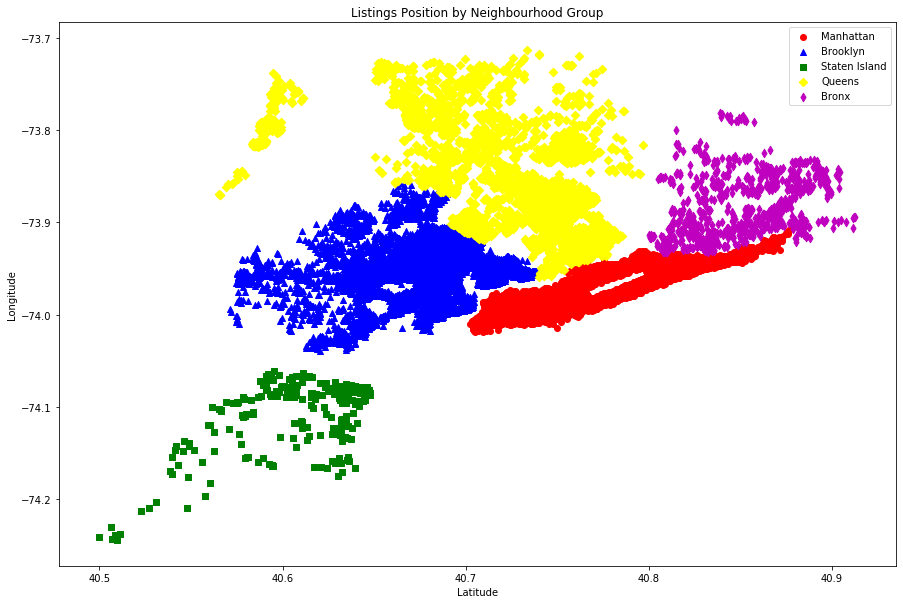

In [60]:
plt.figure(figsize=(15,10))
neighbourhood = sort_grp_nhood_rtype_mean_df["neighbourhood_group"].unique()

markers = ["o","^","s","D","d","p","*","x",".","P"]
colors = ["r", "b", "g", "yellow","m","c","pink","yellow"]

for i, hood in enumerate(neighbourhood):
    neigh = clean_AirBnB_df[clean_AirBnB_df["neighbourhood_group"] == hood]
    plt.scatter(neigh["latitude"], neigh["longitude"], marker=markers[i], color=colors[i], label=hood)
    
set_graph_properties("Listings Position by Neighbourhood Group","Latitude","Longitude")
#m = Basemap(projection='cyl', resolution=None,
#            llcrnrlat=40.499790000000004, urcrnrlat=40.913059999999994,
#            llcrnrlon=-74.24441999999999, urcrnrlon=-73.71299, )
#draw_map(m)
plt.legend()    
plt.show()

In [71]:
corr = clean_AirBnB_df.corr()
Clean_Corr = corr.rename(columns={"calculated_host_listings_count":"Listing qty","minimum_nights":"min nights","number_of_reviews":"# of reviews","reviews_per_month":"reviews/mth","availability_365":"availability2019"})
#Clean_Corr = corr.rename(columns={"minimum_nights":"min nights")
Clean_Corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,host_id,latitude,longitude,price,min nights,# of reviews,reviews/mth,Listing qty,availability2019
id,1,0.59,0.0043,0.055,0.021,-0.046,-0.47,0.084,0.12,-0.11
host_id,0.59,1,0.012,0.1,0.015,-0.043,-0.24,0.13,0.14,0.078
latitude,0.0043,0.012,1,0.079,0.034,0.036,-0.013,-0.018,0.025,-0.0037
longitude,0.055,0.1,0.079,1,-0.16,-0.082,0.034,0.12,-0.15,0.028
price,0.021,0.015,0.034,-0.16,1,0.039,-0.073,-0.083,0.061,0.075
minimum_nights,-0.046,-0.043,0.036,-0.082,0.039,1,-0.12,-0.18,0.12,0.13
number_of_reviews,-0.47,-0.24,-0.013,0.034,-0.073,-0.12,1,0.54,-0.12,0.0099
reviews_per_month,0.084,0.13,-0.018,0.12,-0.083,-0.18,0.54,1,-0.11,-0.089
calculated_host_listings_count,0.12,0.14,0.025,-0.15,0.061,0.12,-0.12,-0.11,1,0.19
availability_365,-0.11,0.078,-0.0037,0.028,0.075,0.13,0.0099,-0.089,0.19,1


### 3D Plot

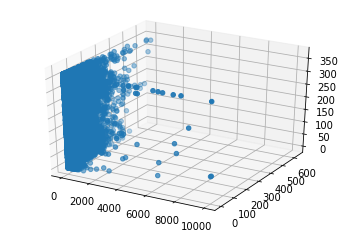

In [126]:
#ax = plt.axes(projection ='3d')

fig = plt.figure()
ax = plt.axes(projection= '3d')
ax.scatter3D(clean_AirBnB_df["price"],clean_AirBnB_df["number_of_reviews"],clean_AirBnB_df["availability_365"])
plt.show()